
<br>

---

# binary classification problem: 

---

<br>

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [31]:

df = pd.read_csv("dataset/Churn_Modelling.csv")
df.shape

(10000, 14)

In [32]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:

# আমাদের এইখানে, RowNumber, CustomerId, Surname তেমন কোন কাজের না । 

df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df.head(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [35]:
df.duplicated().sum()

0

In [36]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:

# manage categorical data:
df = pd.get_dummies(df,columns=["Geography"	,"Gender"],drop_first=True)
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [38]:

X = df.drop(columns=["Exited"])
y = df["Exited"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [39]:

# do feature scaling: 

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)



In [40]:

X_train_sc


array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [41]:

model = tf.keras.Sequential()

# we can also use like this: tf.keras.activations.relu

# input layer
model.add(tf.keras.layers.Dense(11,activation="relu",input_dim = 11))
model.add(tf.keras.layers.BatchNormalization())
# hidden layer
model.add(tf.keras.layers.Dense(11,activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
# output layer
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))


/home/yasin/allProgram/100DaysDL/code/venvML/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364 (1.42 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 44 (176.00 B)

In [43]:


loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])



In [44]:
# appling early stoping 
callback = tf.keras.callbacks.EarlyStopping(verbose=1,monitor="val_loss",mode="auto",patience=20,min_delta=0.00001)

In [45]:

history = model.fit(X_test_sc,y_train,epochs=20,validation_split=0.2,callbacks=callback)


Epoch 1/20


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5416 - loss: 0.8605 - val_accuracy: 0.4650 - val_loss: 0.8125
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6231 - loss: 0.6928 - val_accuracy: 0.6050 - val_loss: 0.6860
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6742 - loss: 0.6315 - val_accuracy: 0.6775 - val_loss: 0.6304
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7432 - loss: 0.5910 - val_accuracy: 0.7200 - val_loss: 0.6007
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7716 - loss: 0.5501 - val_accuracy: 0.7250 - val_loss: 0.5842
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7699 - loss: 0.5400 - val_accuracy: 0.7275 - val_loss: 0.5718
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7940 - loss: 0.5109 - val_accuracy: 0.7425 - val_loss: 0.5662
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 0.5166 - val_accuracy: 0.7450 - val_loss: 0.5661
Epo

In [46]:

# model trained that means we get the wight and bias 

model.layers[0].get_weights()

# output of 1st layer (11*11) and 11 bias 


[array([[ 0.0585884 , -0.08008957,  0.35410663, -0.38497883,  0.500067  ,
          0.17202576,  0.26969334, -0.37770107,  0.35987556,  0.18973131,
         -0.37820238],
        [ 0.4391877 ,  0.227983  , -0.235448  , -0.05785026, -0.25149325,
          0.45070595,  0.27316853, -0.1756081 ,  0.09266692, -0.4612223 ,
          0.32645917],
        [ 0.00175997,  0.6547865 , -0.00897974, -0.07038502, -0.15713176,
          0.31731182,  0.03384238,  0.21525912,  0.3526927 ,  0.50402796,
          0.14723523],
        [ 0.46727887,  0.5247188 ,  0.41442242, -0.04531386, -0.3556066 ,
          0.51729274,  0.20618564, -0.34860387,  0.46989256, -0.3955564 ,
         -0.31595907],
        [-0.45744947, -0.06600318,  0.13432266, -0.35694113, -0.29078177,
         -0.0613779 , -0.3829155 , -0.4208554 ,  0.45906428, -0.06979367,
         -0.1375968 ],
        [-0.15807557, -0.13073142,  0.14946128,  0.07093417, -0.40133816,
         -0.3301147 , -0.15308782,  0.4355492 ,  0.12286107, -0.0478426

In [47]:

y_log = model.predict(X_test_sc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [48]:

y_pred = np.where(y_log>0.5,1,0)

In [49]:

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score * 100


79.05

In [50]:
history.history


{'accuracy': [0.5674999952316284,
  0.6318749785423279,
  0.6924999952316284,
  0.7506250143051147,
  0.7743750214576721,
  0.7825000286102295,
  0.7856249809265137,
  0.7868750095367432,
  0.7862499952316284,
  0.7875000238418579,
  0.7925000190734863,
  0.7925000190734863,
  0.7931249737739563,
  0.7925000190734863,
  0.7893750071525574,
  0.7918750047683716,
  0.7912499904632568,
  0.7931249737739563,
  0.7912499904632568,
  0.7912499904632568],
 'loss': [0.7978315949440002,
  0.6800703406333923,
  0.6249982118606567,
  0.5785046815872192,
  0.5468486547470093,
  0.5325493216514587,
  0.5218281745910645,
  0.5176284909248352,
  0.5105392932891846,
  0.5094101428985596,
  0.5082967877388,
  0.5036485195159912,
  0.5009467601776123,
  0.5048520565032959,
  0.5019158124923706,
  0.5013838410377502,
  0.4991000294685364,
  0.4968516230583191,
  0.49765828251838684,
  0.4950929284095764],
 'val_accuracy': [0.4650000035762787,
  0.6050000190734863,
  0.6775000095367432,
  0.72000002861022

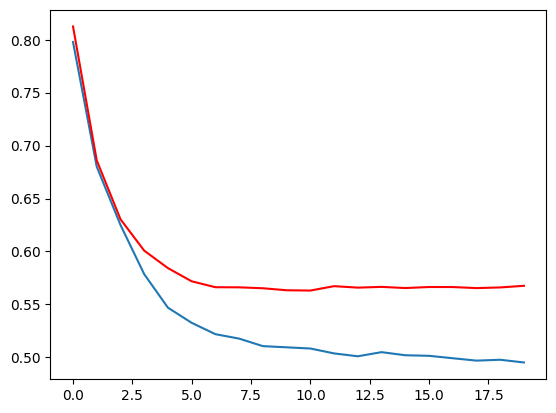

In [51]:

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"],c='r')


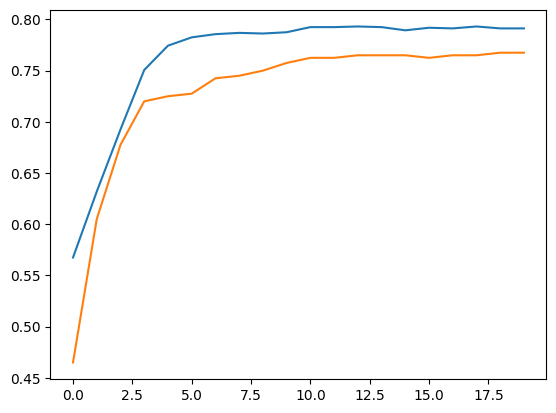

In [52]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [16]:
word = "abcdced"
x  = word.find("d")
ans = word[0:4]
ans 

'abcd'